In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

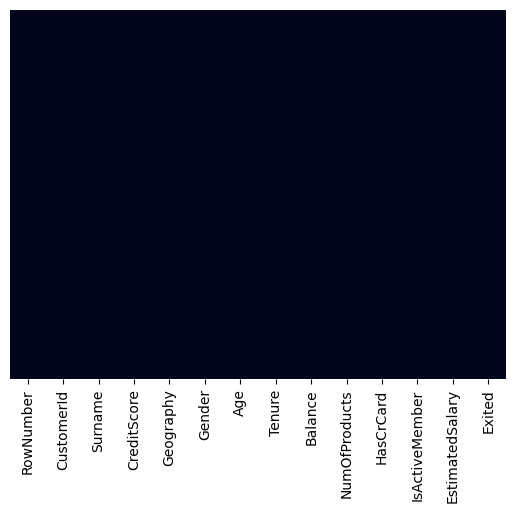

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
pd.unique(df['Geography'])

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
sex = pd.get_dummies(df['Gender'],drop_first=True)

In [12]:
df = pd.concat([df,sex],axis=1)

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [15]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
df.drop('Gender',axis=1,inplace=True)
country =  pd.get_dummies(df['Geography'],drop_first=True)
df = pd.concat([df,country],axis=1)

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [18]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [19]:
df.drop('Geography',axis=1,inplace=True)

In [20]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [22]:
g = pd.read_csv('Churn_Modelling.csv')

<Axes: xlabel='Gender', ylabel='count'>

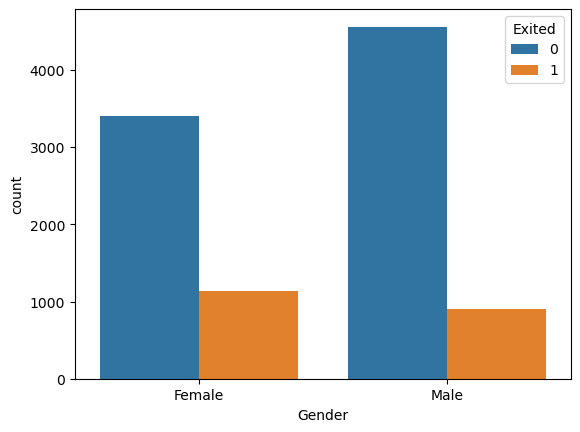

In [25]:
sns.countplot(data=g, x='Gender',hue='Exited')

([<matplotlib.patches.Wedge at 0x20bc91d3110>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'Exited'),
  Text(0.8823431426537006, -0.6568642010431012, 'Not Exited')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

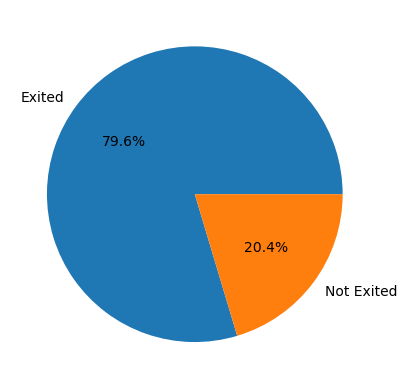

In [29]:
plt.pie(df['Exited'].value_counts(),labels=['Exited','Not Exited'],autopct='%1.1f%%')

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
X = df.drop('Exited',axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()

In [34]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [36]:
log_predic = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,log_predic))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2378
           1       0.32      0.05      0.08       622

    accuracy                           0.78      3000
   macro avg       0.56      0.51      0.48      3000
weighted avg       0.70      0.78      0.71      3000



In [39]:
print(confusion_matrix(y_test,log_predic))

[[2318   60]
 [ 594   28]]


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=300)

In [42]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [43]:
rfc_predict = rfc.predict(X_test)

In [44]:
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2378
           1       0.78      0.49      0.60       622

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.85      3000



In [45]:
print(confusion_matrix(y_test,rfc_predict))

[[2295   83]
 [ 319  303]]


In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors = 20)

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [57]:
knn_pred = knn.predict(X_test)

In [58]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2378
           1       1.00      0.00      0.00       622

    accuracy                           0.79      3000
   macro avg       0.90      0.50      0.44      3000
weighted avg       0.84      0.79      0.70      3000

